<a href="https://colab.research.google.com/github/gautamnaik1994/GlassQualityPrediction/blob/master/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Glass Quality Prediction
https://www.machinehack.com/hackathons/glass_quality_prediction_weekend_hackathon_6

### Overview
We humans have been using glass since ancient times for a variety of applications from building construction to making decorative objects. With technology, glass and its applications have evolved, and today, we have different varieties of glass used for very different purposes from a computer monitor to a bulletproof car window depending on the grade of the glass produced. And not all grades or varieties are manufactured the same way. In this data science challenge, you as a data scientist must use the given data to predict the grade of the glass produced based on the given factors.Given are 15 distinguishing factors that can provide insight into what grade of the glass is being produced. Your objective as a data scientist is to build a machine learning model that can predict the grade of glass based on the given factors.

### Evaluation
The leaderboard is evaluated on the standard log_loss metric from sklearn



In [ ]:
!pip install seaborn

     |████████████████████████████████| 215 kB 3.4 MB/s eta 0:00:01


In [3]:
import pandas as pd
import seaborn as sns
from IPython.core.interactiveshell import InteractiveShell
import matplotlib.pyplot as plt
InteractiveShell.ast_node_interactivity = "all"
from IPython.core.pylabtools import figsize
import numpy as np
import pickle
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score, log_loss
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.calibration import CalibratedClassifierCV
from sklearn import tree

In [5]:
!wget https://raw.githubusercontent.com/gautamnaik1994/GlassQualityPrediction/master/Glass_Quality_Participants_Data/Train.csv

--2020-07-21 19:28:38--  https://raw.githubusercontent.com/gautamnaik1994/GlassQualityPrediction/master/Glass_Quality_Participants_Data/Train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 93708 (92K) [text/plain]
Saving to: ‘Train.csv’

Train.csv           100%[===================>]  91.51K  --.-KB/s    in 0.03s   

2020-07-21 19:28:38 (2.89 MB/s) - ‘Train.csv’ saved [93708/93708]



In [6]:
# Only for Google Collab
train=pd.read_csv("./Train.csv")

In [7]:
train=pd.read_csv("./Glass_Quality_Participants_Data/Train.csv")
test=pd.read_csv("./Glass_Quality_Participants_Data/Test.csv")

In [8]:
train_orig=train.copy()

In [ ]:
def show_missing_count(data):
    miss_percent = (data.isnull().sum() / len(data)) * 100
    missing = pd.DataFrame({"Percent":miss_percent, 'Count':data.isnull().sum()}).sort_values(by="Percent", ascending=False)
    missing=missing.loc[missing['Percent'] > 0]
    return missing

## EDA

In [ ]:
train.head(10)
test.head()

,grade_A_Component_1,grade_A_Component_2,max_luminosity,thickness,xmin,xmax,ymin,ymax,pixel_area,log_area,x_component_1,x_component_2,x_component_3,x_component_4,x_component_5,class
0,0,1,150,36,144,172,947225,947332,439,439.099273,0,0,1,0,0,1
1,1,0,134,55,1144,1152,2379058,2379624,329,329.205616,1,0,0,0,0,1
2,1,0,135,65,950,974,1038442,1036754,300,300.120598,0,0,0,0,0,2
3,0,1,123,35,41,220,1705580,1705604,6803,6803.778622,0,0,1,0,0,1
4,1,0,138,69,462,466,1088124,1086579,251,251.401943,0,0,0,0,0,2
5,1,0,127,72,246,256,1137516,1136929,177,177.184821,0,1,0,0,0,1
6,0,1,99,39,242,359,87212,87169,3369,3369.037497,0,0,1,0,0,1
7,0,1,136,38,48,202,697615,696534,6159,6159.902918,0,0,1,0,0,1
8,0,1,121,43,42,214,4401789,4401986,5667,5667.675157,0,0,1,0,0,1
9,1,0,115,99,1289,1304,1005611,1006124,281,281.072866,1,0,0,0,0,1


,grade_A_Component_1,grade_A_Component_2,max_luminosity,thickness,xmin,xmax,ymin,ymax,pixel_area,log_area,x_component_1,x_component_2,x_component_3,x_component_4,x_component_5
0,1,0,123,65,33,54,1646439,1646893,632,632.391749,0,1,0,0,0
1,0,1,158,99,125,132,189874,189529,421,421.928609,0,0,0,0,0
2,0,1,120,35,64,75,12986873,12986862,272,272.212214,1,0,0,0,0
3,0,1,130,39,57,177,309634,310824,3312,3312.310581,0,0,1,0,0
4,1,0,142,75,23,79,5368307,5367467,862,862.499179,0,0,0,0,0


In [ ]:
train.describe()
train.info()

,grade_A_Component_1,grade_A_Component_2,max_luminosity,thickness,xmin,xmax,ymin,ymax,pixel_area,log_area,x_component_1,x_component_2,x_component_3,x_component_4,x_component_5,class
count,1358.000000,1358.000000,1358.000000,1358.000000,1358.000000,1358.000000,1.358000e+03,1.358000e+03,1358.000000,1358.000000,1358.000000,1358.000000,1358.000000,1358.000000,1358.000000,1358.000000
mean,0.406480,0.593520,137.893225,78.977909,567.370398,614.032401,1.660107e+06,1.660139e+06,1903.402798,1903.896240,0.081738,0.106038,0.197349,0.035346,0.027982,1.346834
std,0.491357,0.491357,20.480512,55.324842,522.013094,500.505513,1.778153e+06,1.778177e+06,3839.156721,3839.163241,0.274066,0.308000,0.398145,0.184721,0.164983,0.476138
min,0.000000,0.000000,71.000000,35.000000,0.000000,4.000000,7.527000e+03,7.453000e+03,3.000000,3.445293,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,127.000000,42.000000,53.000000,192.000000,4.662742e+05,4.666918e+05,234.000000,234.335948,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,1.000000,137.000000,66.000000,407.500000,457.000000,1.216168e+06,1.214700e+06,346.000000,346.044490,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,1.000000,146.000000,83.000000,1041.750000,1064.000000,2.210012e+06,2.210076e+06,915.250000,915.367817,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,1.000000,1.000000,266.000000,305.000000,1692.000000,1717.000000,1.291748e+07,1.291731e+07,37392.000000,37392.672970,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1358 entries, 0 to 1357
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   grade_A_Component_1  1358 non-null   int64  
 1   grade_A_Component_2  1358 non-null   int64  
 2   max_luminosity       1358 non-null   int64  
 3   thickness            1358 non-null   int64  
 4   xmin                 1358 non-null   int64  
 5   xmax                 1358 non-null   int64  
 6   ymin                 1358 non-null   int64  
 7   ymax                 1358 non-null   int64  
 8   pixel_area           1358 non-null   int64  
 9   log_area             1358 non-null   float64
 10  x_component_1        1358 non-null   int64  
 11  x_component_2        1358 non-null   int64  
 12  x_component_3        1358 non-null   int64  
 13  x_component_4        1358 non-null   int64  
 14  x_component_5        1358 non-null   int64  
 15  class                1358 non-null   i

In [ ]:
class1=train.loc[train["class"]==1]
class2=train.loc[train["class"]==2]

In [ ]:
train["class"].value_counts()

1    887
2    471
Name: class, dtype: int64

Skew : 1.2660266921078014
Kurtosis : 6.009707701418586


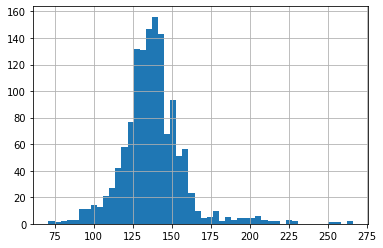

In [ ]:
train["max_luminosity"].hist(bins=50);
print(f'Skew : {train["max_luminosity"].skew()}')
print(f'Kurtosis : {train["max_luminosity"].kurtosis()}')

Skew : 0.08469729350101923


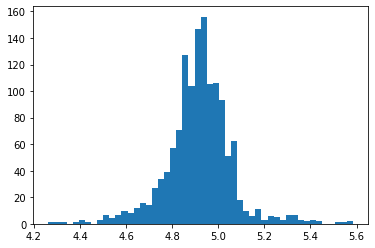

In [ ]:
plt.hist(np.log(train["max_luminosity"]), bins=50);
print(f'Skew : {np.log(train["max_luminosity"]).skew()}');

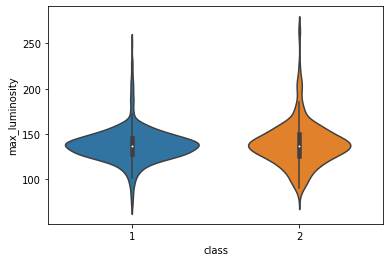

In [ ]:
sns.violinplot(y="max_luminosity",data=train, x="class")

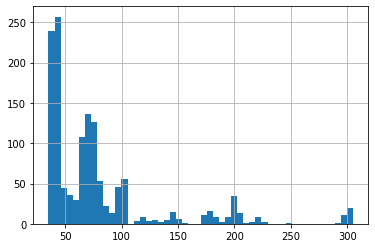

In [ ]:
train["thickness"].hist(bins=50)

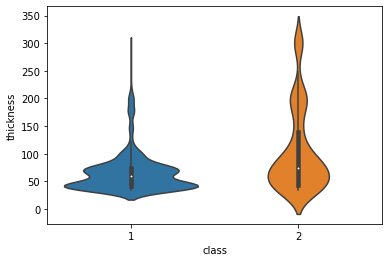

In [ ]:
sns.violinplot(y="thickness",data=train, x="class")

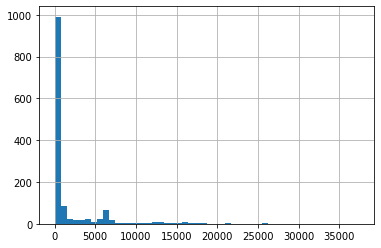

In [ ]:
train["pixel_area"].hist(bins=50)

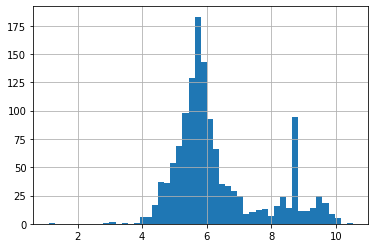

In [ ]:
np.log(train["pixel_area"]).hist(bins=50)

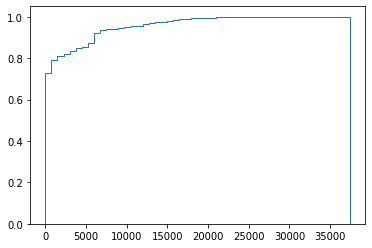

In [ ]:
plt.hist(train["pixel_area"], 50, density=True, histtype='step',cumulative=True);

In [ ]:
train.loc[train["pixel_area"]>20000].describe()  

,grade_A_Component_1,grade_A_Component_2,max_luminosity,thickness,xmin,xmax,ymin,ymax,pixel_area,log_area,x_component_1,x_component_2,x_component_3,x_component_4,x_component_5,class
count,8.0,8.0,8.000000,8.000000,8.000000,8.000000,8.000000e+00,8.000000e+00,8.000000,8.000000,8.0,8.0,8.000000,8.0,8.0,8.000000
mean,0.0,1.0,153.250000,38.500000,5.875000,319.125000,6.325196e+05,6.329789e+05,24788.875000,24789.448257,0.0,0.0,0.875000,0.0,0.0,1.125000
std,0.0,0.0,8.241879,3.070598,6.243568,222.752545,6.685811e+05,6.686643e+05,5488.647672,5488.746230,0.0,0.0,0.353553,0.0,0.0,0.353553
min,0.0,1.0,143.000000,35.000000,0.000000,151.000000,3.075550e+05,3.096670e+05,20752.000000,20752.149798,0.0,0.0,0.000000,0.0,0.0,1.000000
25%,0.0,1.0,145.250000,35.750000,2.500000,223.750000,3.418710e+05,3.419968e+05,21175.250000,21175.653058,0.0,0.0,1.000000,0.0,0.0,1.000000
50%,0.0,1.0,156.000000,38.500000,5.000000,226.500000,4.132280e+05,4.134760e+05,23373.500000,23374.240741,0.0,0.0,1.000000,0.0,0.0,1.000000
75%,0.0,1.0,157.750000,41.250000,5.750000,283.500000,4.759692e+05,4.769512e+05,25597.250000,25598.000504,0.0,0.0,1.000000,0.0,0.0,1.000000
max,0.0,1.0,163.000000,42.000000,20.000000,830.000000,2.278939e+06,2.279698e+06,37392.000000,37392.672970,0.0,0.0,1.000000,0.0,0.0,2.000000


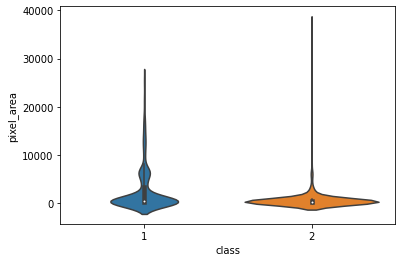

In [ ]:
sns.violinplot(y="pixel_area",data=train, x="class")

Wall time: 347 ms


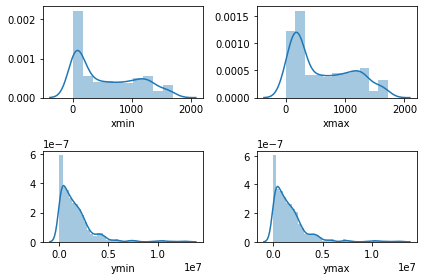

In [ ]:
%%time

cols=["xmin"	,"xmax"	,"ymin"	,"ymax"	]

fig, axes = plt.subplots(2, 2)
cnt=0
for row in axes:
    for col in row:
#         col.hist(df.iloc[:,cnt])
#         col.set_title(cols[cnt])
        sns.distplot(train[cols[cnt]] ,ax=col)
        cnt=cnt+1

plt.tight_layout()

In [ ]:
tmpArea=abs(train["xmax"]-train["xmin"]) * abs(train["ymax"]-train["ymin"])

In [ ]:
tmpArea.describe()

count    1.358000e+03
mean     3.198133e+04
std      8.714268e+04
min      0.000000e+00
25%      4.011000e+03
50%      9.195500e+03
75%      2.090000e+04
max      1.635686e+06
dtype: float64

In [ ]:
tmpArea.loc[tmpArea ==0]

144    0
464    0
dtype: int64

In [ ]:
train.iloc[464,:]

grade_A_Component_1    1.000000e+00
grade_A_Component_2    0.000000e+00
max_luminosity         1.360000e+02
thickness              7.500000e+01
xmin                   7.590000e+02
xmax                   7.710000e+02
ymin                   3.897375e+06
ymax                   3.897375e+06
pixel_area             2.060000e+02
log_area               2.063788e+02
x_component_1          0.000000e+00
x_component_2          0.000000e+00
x_component_3          0.000000e+00
x_component_4          0.000000e+00
x_component_5          0.000000e+00
class                  1.000000e+00
Name: 464, dtype: float64

Need to drop rows with "area" == 0

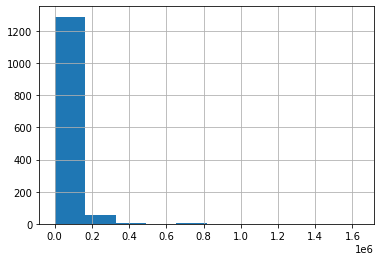

In [ ]:
tmpArea=tmpArea.loc[tmpArea > 0]
tmpArea.hist()

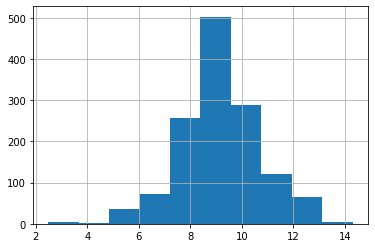

In [ ]:
np.log(tmpArea).hist()

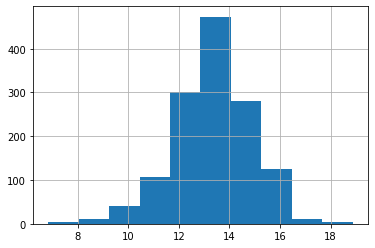

In [ ]:
tmpVol=abs(train["xmax"]-train["xmin"]) * abs(train["ymax"]-train["ymin"]) * train["thickness"]
tmpVol = tmpVol.loc[tmpVol > 0]
np.log(tmpVol).hist()

Wall time: 279 ms


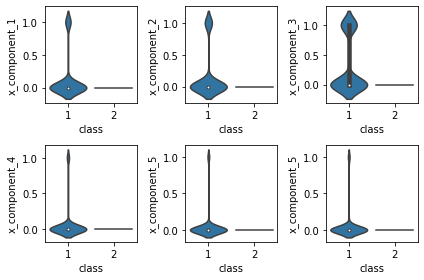

In [ ]:
%%time

cols=["x_component_1","x_component_2","x_component_3","x_component_4","x_component_5","x_component_5"]

fig, axes = plt.subplots(2, 3)
cnt=0
for row in axes:
    for col in row:
#         col.hist(df.iloc[:,cnt])
#         col.set_title(cols[cnt])
        sns.violinplot(y=cols[cnt],data=train, x="class" ,ax=col)
        cnt=cnt+1

plt.tight_layout()

Wall time: 284 ms


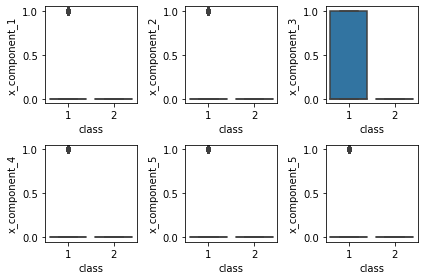

In [ ]:
%%time

cols=["x_component_1","x_component_2","x_component_3","x_component_4","x_component_5","x_component_5"]

fig, axes = plt.subplots(2, 3)
cnt=0
for row in axes:
    for col in row:
        sns.boxplot(y=cols[cnt],data=train, x="class" ,ax=col)
        cnt=cnt+1
        
plt.tight_layout()

It is clear from above plot that "x_component_3" can be used to separate class 1 and class 2

## Feature Engineering

In [9]:
def features(data):
    data["log_max_luminosity"]=np.log(data["max_luminosity"])
    data["area"] = abs(data["xmax"]-data["xmin"]) * abs(data["ymax"]-data["ymin"])
    data = data.loc[data["area"]>0].copy() ##to hide "Try using .loc[row_indexer,col_indexer] = value instead" error
    data["volume"]=data["area"] * data["thickness"]
    
    data["log_area"] = np.log(data["area"])
    data["log_volume"] = np.log(data["volume"])
    data["log_pixel_area"] = np.log(data["pixel_area"])
    
    data=data.drop(["area","volume","max_luminosity","xmax","xmin","ymax","ymin","pixel_area","grade_A_Component_2"],axis=1)
    return data
    

In [10]:
X=features(train)
X.head()

,grade_A_Component_1,thickness,log_area,x_component_1,x_component_2,x_component_3,x_component_4,x_component_5,class,log_max_luminosity,log_volume,log_pixel_area
0,0,36,8.005033,0,0,1,0,0,1,5.010635,11.588552,6.084499
1,1,55,8.418036,1,0,0,0,0,1,4.897840,12.425369,5.796058
2,1,65,10.609354,0,0,0,0,0,2,4.905275,14.783741,5.703782
3,0,35,8.365440,0,0,1,0,0,1,4.812184,11.920788,8.825119
4,1,69,8.729074,0,0,0,0,0,2,4.927254,12.963180,5.525453


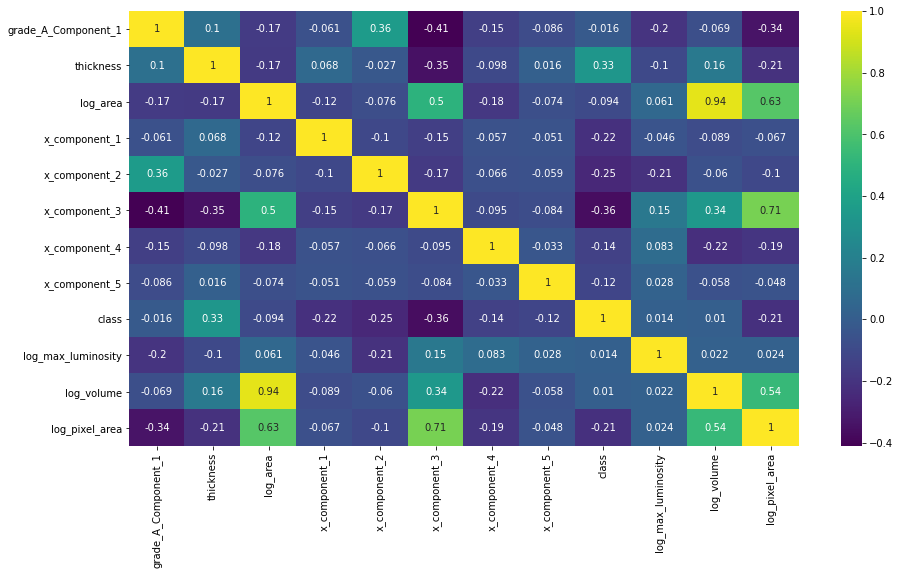

In [11]:
figsize(15,8)
sns.heatmap(X.corr(),cmap="viridis",annot=True)

## Modelling

In [12]:
y_true = X['class'].values

X_train, X_test, y_train, y_test = train_test_split(X, y_true, stratify=y_true, test_size=0.2)
# Cross Validation Set
# X_train_cv, X_test_cv, y_train_cv, y_test_cv = train_test_split(X_train, y_train, stratify=y_train, test_size=0.2)

In [13]:
print('Number of points in train data:', X_train.shape[0])
print('Number of points in test data:', X_test.shape[0])

Number of points in train data: 1084
Number of points in test data: 272


In [15]:

train_class_distribution = X_train['class'].value_counts()
test_class_distribution = X_test['class'].value_counts()

sorted_yi = np.argsort(-train_class_distribution.values)

for i in sorted_yi:
    print('Number of data points in train_df class', i+1, ':',train_class_distribution.values[i], '(', np.round((train_class_distribution.values[i]/X_train.shape[0]*100), 3), '%)')

    
print('-'*80)

sorted_yi = np.argsort(-test_class_distribution.values)
for i in sorted_yi:
    print('Number of data points in test_df class', i+1, ':',test_class_distribution.values[i], '(', np.round((test_class_distribution.values[i]/X_test.shape[0]*100), 3), '%)')

print('-'*80)


Number of data points in train_df class 1 : 708 ( 65.314 %)
Number of data points in train_df class 2 : 376 ( 34.686 %)
--------------------------------------------------------------------------------
Number of data points in test_df class 1 : 178 ( 65.441 %)
Number of data points in test_df class 2 : 94 ( 34.559 %)
--------------------------------------------------------------------------------


In [ ]:
rand_probs=np.random.rand(1,2)
rand_probs
sum(sum(rand_probs))
rand_probs/sum(sum(rand_probs))
sum(sum(rand_probs/sum(sum(rand_probs))))
# cv_predicted_y[i] = ((rand_probs/sum(sum(rand_probs)))[0])

array([[0.30052897, 0.39555626]])

0.6960852363964121

array([[0.43174163, 0.56825837]])

1.0

In [18]:
X_test_len = X_test.shape[0]
X_train_len = X_train.shape[0]

# we create a output array that has exactly same size as the CV data
predicted_y = np.zeros((X_train_len,2))
for i in range(X_train_len):
    rand_probs = np.random.rand(1,2)
    predicted_y[i] = ((rand_probs/sum(sum(rand_probs)))[0])
print("Log loss on Train data using Random Model",log_loss(y_train,predicted_y, eps=1e-15))


# Test-Set error.
#we create a output array that has exactly same as the test data
test_predicted_y = np.zeros((X_test_len,2))
for i in range(X_test_len):
    rand_probs = np.random.rand(1,2)
    test_predicted_y[i] = ((rand_probs/sum(sum(rand_probs)))[0])
print("Log loss on Test Data using Random Model",log_loss(y_test,test_predicted_y, eps=1e-15))

Log loss on Train data using Random Model 0.9019860054790326
Log loss on Test Data using Random Model 0.9385700597786073


In [19]:
# dropping class column 

X_train.drop("class",inplace=True,axis=1)
X_test.drop("class",inplace=True,axis=1)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [20]:
skf = StratifiedKFold(n_splits=10)

### Naive Bayes

In [21]:
# X_train, test_df, y_train, y_test = train_test_split(X, y_true, stratify=y_true, test_size=0.2)
# train_df, cv_df, y_train, y_cv = train_test_split(X_train, y_train, stratify=y_train, test_size=0.2)

clf = GaussianNB()
clf.fit(X_train, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

CalibratedClassifierCV(base_estimator=GaussianNB(priors=None,
                                                 var_smoothing=1e-09),
                       cv=None, method='sigmoid')

In [22]:
cross_val_score(sig_clf,X_train,y_train,scoring="neg_log_loss",cv=10,n_jobs=-1) 

array([-0.41924315, -0.27214359, -0.41908665, -0.37423351, -0.39131161,
       -0.34670917, -0.36438287, -0.33802983, -0.38654545, -0.39552276])

In [23]:
predict_y = sig_clf.predict_proba(X_train)
print("The train log loss is:",log_loss(y_train, predict_y,  eps=1e-15))
predict_y = sig_clf.predict_proba(X_test)
print("The test log loss is:",log_loss(y_test, predict_y,  eps=1e-15))
print("Number of missclassified point :", np.count_nonzero((sig_clf.predict(X_test) - y_test))/y_test.shape[0])

The train log loss is: 0.3697494788201036
The test log loss is: 0.3533593720990996
Number of missclassified point : 0.19117647058823528


### Logistic Regression

for C = 0.001


LogisticRegression(C=0.001, n_jobs=-1)

CalibratedClassifierCV(base_estimator=LogisticRegression(C=0.001, n_jobs=-1))

Log Loss : 0.5472165995142253
for C = 0.01


LogisticRegression(C=0.01, n_jobs=-1)

CalibratedClassifierCV(base_estimator=LogisticRegression(C=0.01, n_jobs=-1))

Log Loss : 0.5307901120523942
for C = 0.1


LogisticRegression(C=0.1, n_jobs=-1)

CalibratedClassifierCV(base_estimator=LogisticRegression(C=0.1, n_jobs=-1))

Log Loss : 0.4338696862860747
for C = 1


LogisticRegression(C=1, n_jobs=-1)

CalibratedClassifierCV(base_estimator=LogisticRegression(C=1, n_jobs=-1))

Log Loss : 0.346314710335684
for C = 10


LogisticRegression(C=10, n_jobs=-1)

CalibratedClassifierCV(base_estimator=LogisticRegression(C=10, n_jobs=-1))

Log Loss : 0.33017248990105685
for C = 100


LogisticRegression(C=100, n_jobs=-1)

CalibratedClassifierCV(base_estimator=LogisticRegression(C=100, n_jobs=-1))

Log Loss : 0.3312399952076914


Text(0.001, 0.5472165995142253, "(0.001, '0.547')")

Text(0.01, 0.5307901120523942, "(0.01, '0.531')")

Text(0.1, 0.4338696862860747, "(0.1, '0.434')")

Text(1, 0.346314710335684, "(1, '0.346')")

Text(10, 0.33017248990105685, "(10, '0.33')")

Text(100, 0.3312399952076914, "(100, '0.331')")

Text(0.5, 1.0, 'Cross Validation Error for each alpha')

Text(0.5, 0, "Alpha i's")

Text(0, 0.5, 'Error measure')

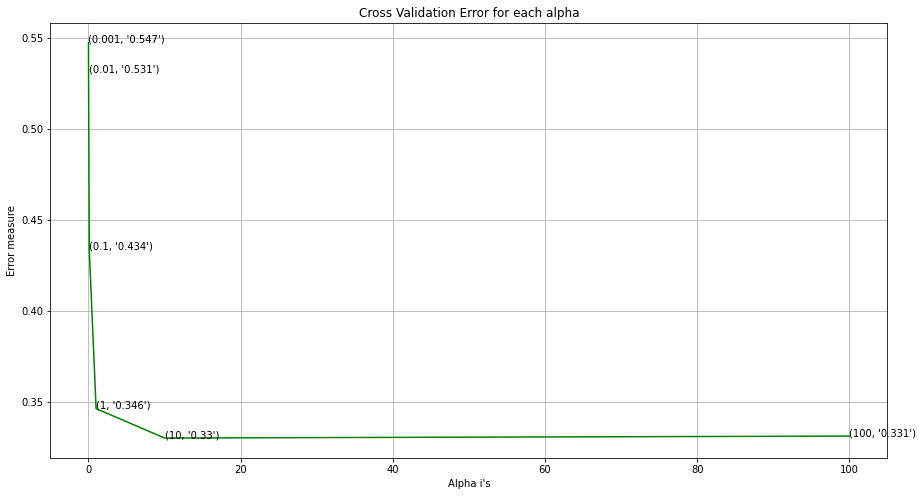

LogisticRegression(C=10, n_jobs=-1)

CalibratedClassifierCV(base_estimator=LogisticRegression(C=10, n_jobs=-1))

For values of best alpha =  10 The train log loss is: 0.32328024641296693
For values of best alpha =  10 The cross validation log loss is: 0.33017248990105685
For values of best alpha =  10 The test log loss is: 0.3356343124452068


In [ ]:
alpha = [0.001,0.01,0.1,1,10,100]
cv_log_error_array = []
for i in alpha:
    print("for C =", i)
    clf = LogisticRegression(C=i,n_jobs=-1 )
    clf.fit(train_df, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_df, y_train)
    sig_clf_probs = sig_clf.predict_proba(cv_df)
    cv_log_error_array.append(log_loss(y_cv, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("Log Loss :",log_loss(y_cv, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = LogisticRegression(C=alpha[best_alpha],n_jobs=-1)
clf.fit(train_df, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_df, y_train)

predict_y = sig_clf.predict_proba(train_df)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_df)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_df)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))


In [24]:
lg=LogisticRegression(n_jobs=-1)
clf = CalibratedClassifierCV(lg, method="sigmoid")

In [25]:
params_LogisticRegression = {'base_estimator__C': [0.1,1,10,50,100]}


gs_LogisticRegression = GridSearchCV(estimator=clf, 
                      param_grid=params_LogisticRegression, 
                      cv=10,
                      verbose=1,  # verbose: the higher, the more messages
                      scoring='neg_log_loss', 
                      return_train_score=True,n_jobs=-1)

In [26]:
%%time
gs_LogisticRegression.fit(X_train,y_train)

Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   12.4s


CPU times: user 263 ms, sys: 7.33 ms, total: 270 ms
Wall time: 13.7 s


[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   13.5s finished


GridSearchCV(cv=10, error_score=nan,
             estimator=CalibratedClassifierCV(base_estimator=LogisticRegression(C=1.0,
                                                                                class_weight=None,
                                                                                dual=False,
                                                                                fit_intercept=True,
                                                                                intercept_scaling=1,
                                                                                l1_ratio=None,
                                                                                max_iter=100,
                                                                                multi_class='auto',
                                                                                n_jobs=-1,
                                                                                penalty='l2',
          

In [27]:
gs_LogisticRegression.best_params_

{'base_estimator__C': 10}

In [28]:
gs_LogisticRegression.best_score_

-0.3280067422943721

In [30]:
# test_df=test_df.drop("class",axis=1)
log_loss(y_test, gs_LogisticRegression.predict_proba(X_test), eps=1e-15)  

log_loss(y_train, gs_LogisticRegression.predict_proba(X_train), eps=1e-15)

print("Number of missclassified point :", np.count_nonzero((gs_LogisticRegression.predict(X_test) - y_test))/y_test.shape[0])

0.3349495795277906

0.3241074097080127

Number of missclassified point : 0.15441176470588236


### Random Forest

In [ ]:
rf=RandomForestClassifier(n_jobs=-1,n_estimators=2500)
clf = CalibratedClassifierCV(rf, method="sigmoid")

In [ ]:
# params_RandomForest = {'base_estimator__n_estimators': [500]}
params_RandomForest = {
#     'base_estimator__n_estimators': list(range(500,3000, 500)),
    'base_estimator__max_depth': list(range(1,10, 1))
}

gs_RandomForest = GridSearchCV(estimator=clf, 
                      param_grid=params_RandomForest, 
                      cv=2,
                      verbose=1,  # verbose: the higher, the more messages
                      scoring='neg_log_loss', 
                      return_train_score=True,n_jobs=-1)

In [ ]:
%%time
gs_RandomForest.fit(X_train,y_train)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:  4.8min finished
CPU times: user 43.9 s, sys: 10.2 s, total: 54.1 s
Wall time: 5min 27s


GridSearchCV(cv=2,
             estimator=CalibratedClassifierCV(base_estimator=RandomForestClassifier(n_estimators=2500,
                                                                                    n_jobs=-1)),
             n_jobs=-1,
             param_grid={'base_estimator__max_depth': [1, 2, 3, 4, 5, 6, 7, 8,
                                                       9]},
             return_train_score=True, scoring='neg_log_loss', verbose=1)

In [ ]:
gs_RandomForest.best_params_
gs_RandomForest.best_score_

{'base_estimator__max_depth': 8}

-0.3660396110168394

In [ ]:
log_loss(y_test, gs_RandomForest.predict_proba(X_test), eps=1e-15)  
log_loss(y_train, gs_RandomForest.predict_proba(X_train), eps=1e-15)
print("Number of missclassified point :", np.count_nonzero((gs_RandomForest.predict(X_test) - y_test))/y_test.shape[0])

0.29888070530635236

0.26053276378850476

Number of missclassified point : 0.13970588235294118


### Fitting Random forest again

In [31]:
rf=RandomForestClassifier(n_jobs=-1,n_estimators=2500,max_depth=8)
clf = CalibratedClassifierCV(rf, method="sigmoid")

In [32]:
clf.fit(X_train,y_train)

CalibratedClassifierCV(base_estimator=RandomForestClassifier(bootstrap=True,
                                                             ccp_alpha=0.0,
                                                             class_weight=None,
                                                             criterion='gini',
                                                             max_depth=8,
                                                             max_features='auto',
                                                             max_leaf_nodes=None,
                                                             max_samples=None,
                                                             min_impurity_decrease=0.0,
                                                             min_impurity_split=None,
                                                             min_samples_leaf=1,
                                                             min_samples_split=2,
                                  

In [33]:
log_loss(y_test, clf.predict_proba(X_test), eps=1e-15)  
log_loss(y_train, clf.predict_proba(X_train), eps=1e-15)
print("Number of missclassified point :", np.count_nonzero((clf.predict(X_test) - y_test))/y_test.shape[0])

0.3313001592788075

0.25712661197878145

Number of missclassified point : 0.12867647058823528
